In [1]:
import pickle as pkl
import numpy as np

from src.models.train_emos import train_emos, train_and_test_emos
from src.visualization.pit import make_cpit_diagram_emos, make_cpit_hist_emos 
from src.visualization.brier_score import brier_skill_plot, brier_plot
from src.models.get_data import get_tensors, get_normalized_tensor
from src.models.emos import EMOS
from src.visualization.scoring_tables import make_table
from src.visualization.twcrpss_plot import make_twcrpss_plot
from src.models.emos import EMOS
from src.visualization.reliability_diagram import make_reliability_diagram
from src.training.training import load_model
from src.visualization.plot_forecasts import plot_forecast_cdf, plot_forecast_pdf

2024-03-13 08:48:22.074848: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 08:48:22.101474: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 08:48:22.101495: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 08:48:22.102203: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 08:48:22.106339: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-13 08:48:22.106792: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
folder = '/net/pc200239/nobackup/users/hakvoort/models/emos/trunc_normal/'

base_model = load_model(folder + 'tn_crps_.pkl')
print(base_model)

Using given parameters for Truncated Normal distribution
EMOS Model Information:
Loss function: loss_CRPS_sample (Samples: 200)
Forecast distribution: distr_trunc_normal
Parameters:
  a_tn: [0.3965224]
  b_tn: [ 0.9656694  -0.01666058 -0.146118    0.03517735  0.00451683]
  c_tn: [1.5007248]
  d_tn: [1.0637333]
Features: wind_speed, press, kinetic, humid, geopot
Number of features: 5
Neighbourhood size: 11

Optimizer: Adam
Learning rate: 0.009999999776482582



In [3]:
test_fold = 3
ignore = ['229', '285', '323']
X_test, y_test, variances_test = get_tensors(base_model.neighbourhood_size, base_model.feature_names, test_fold, ignore)
X_test = (X_test - base_model.feature_mean) / base_model.feature_std

print(X_test.shape)

(7780, 5)


In [4]:
threshold_12 = load_model(folder +'tn_twcrps_threshold12.0.pkl')
threshold_15 = load_model(folder +'tn_twcrps_threshold15.0.pkl')

threshold_dict = {'threshold_12': threshold_12, 'threshold_15': threshold_15}

Using given parameters for Truncated Normal distribution
Using given parameters for Truncated Normal distribution


In [5]:
samples = 2000

print('Base model CRPS: ', base_model.loss_CRPS_sample_general(X_test, y_test, variances_test, samples).numpy())
for name, model in threshold_dict.items():
    print(name, 'CRPS: ', model.loss_CRPS_sample_general(X_test, y_test, variances_test, samples).numpy())

Base model CRPS:  0.8905917
threshold_12 CRPS:  0.9142797
threshold_15 CRPS:  0.9106249


There are 7780 values in the PIT diagram


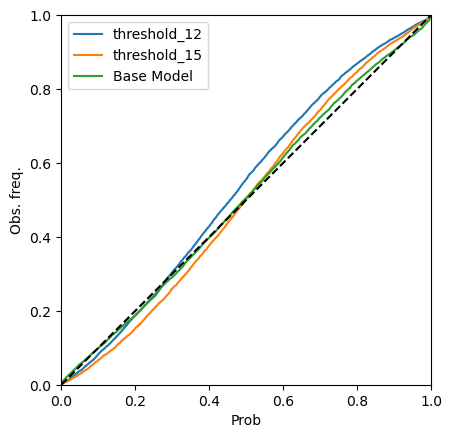

There are 848 values in the PIT diagram


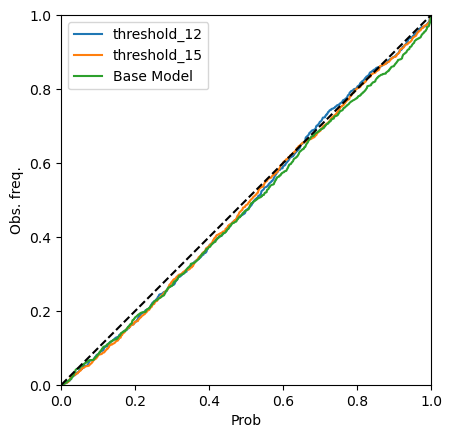

There are 16 values in the PIT diagram


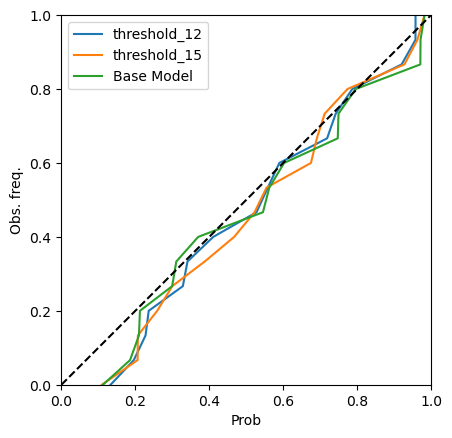

In [8]:
t = 0 
make_cpit_diagram_emos(threshold_dict, X_test, y_test, variances_test, t=t, base_model=base_model)
t=10
make_cpit_diagram_emos(threshold_dict, X_test, y_test, variances_test, t=t, base_model=base_model)
t=15
make_cpit_diagram_emos(threshold_dict, X_test, y_test, variances_test, t=t, base_model=base_model)

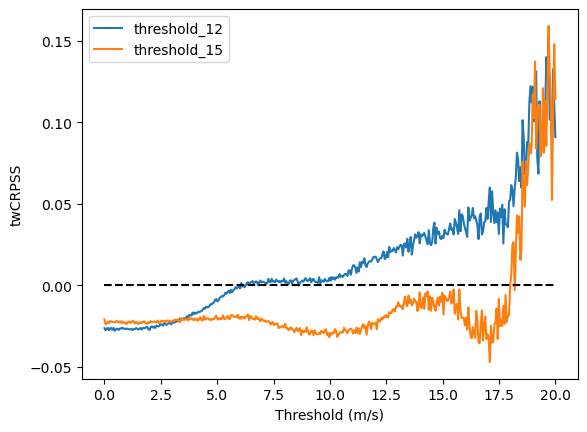

In [7]:
x_values = np.linspace(0, 20, 400)
make_twcrpss_plot(base_model, threshold_dict, X_test, y_test, variances_test, x_values, sample_size=2000)

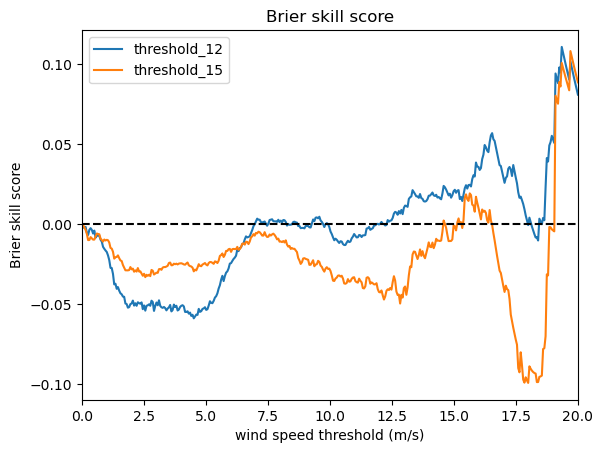

In [8]:
brier_skill_plot(base_model, threshold_dict, X_test, y_test, variances_test, x_values)

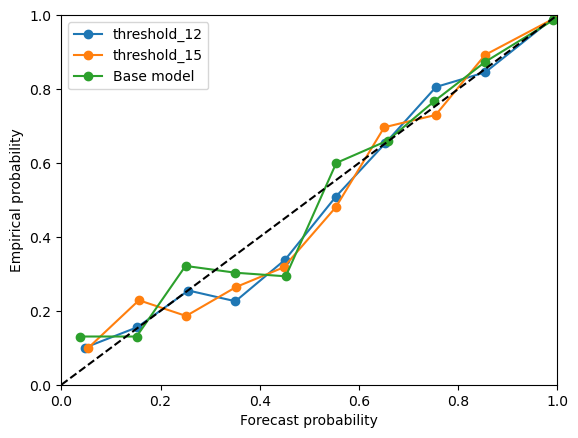

In [9]:
t = 12
make_reliability_diagram(threshold_dict, X_test, y_test, variances_test, t=t, n_subset=11, base_model=base_model)
